In [1]:
# https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
#https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [4]:
from statsmodels.tsa.arima_model import ARMA
from random import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


In [3]:
df  = pd.read_csv("dados_1_bytes_real.csv",header = None)
df = df.drop(columns =[0])
data = df[1]
# fit model
model = ARMA(data, order=(2, 1))
model_fit = model.fit(disp=False)
yhat = [model_fit.predict(index, index) for index in list(range(len(df)))]

In [4]:
xm = list(range(len(yhat)))
ym = [y.values[0] for y in list(yhat)]
ym = ym[1:]
xm2 = xm[:-1]
data = data[:-1]
xm = xm[:-1]

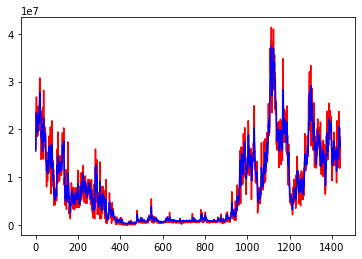

In [5]:
erro = np.linalg.norm(data - ym)**2/np.linalg.norm(data)**2
plt.plot(xm,data,'r',xm2,ym,'b',label = 'Dados reais')
plt.show()
plt.close()

In [5]:
def plot_graph(ym,ym2,interval,tipo,titulo):
    xm = list(range(int(1440/interval)))
    xm = xm[:-1]
    xm1 = [x*60/interval for x in list(range(25))]
    ticks = [x for x in list(range(25))]
    plt.xticks(xm1, ticks)
    plt.plot(xm,ym,'b',label = 'Dados reais')
    plt.plot(xm,ym2,'r',label = 'Previsão(TimeSeries)')
    plt.xlabel("Horas")
    plt.ylabel(f"{tipo}/s")
    plt.title(titulo)
    plt.legend()
    return plt
    plt.show()
    
def savel_plots(day,erro,ym1,ym2,interval,tipo):
    day -=1
    week_days = {
        1:'Sexta',
        2:'Sabado',
        3:'Domingo',
        4:'Segunda',
        5:'Terça',
        6:'Quarta',
        7:'Quinta',
    }
    erro_rounded = round(erro,4)
    titulo = f'{week_days[day]}\nIntervalo:{interval}min\nErro Quadrático:{erro_rounded}'
    
    plt = plot_graph(ym1,ym2,interval,tipo,titulo)
    filename = f"ts{tipo}Intervalo{interval}.png"
    filepath = f"dados/{day}/{filename}"
    plt.savefig(filepath,bbox_inches='tight',dpi=300)
    plt.close()
list_interval = [1,5,10,30]


dayp = []
tipos = ["bytes","pacotes"]

erro_all = []
for tipo in tipos:
    erro_intervals = []
    for interval in list_interval:
        xm = list(range(int(1440/interval)))
        filename = f'dados_{interval}_{tipo}_real.csv'
        df = pd.read_csv(filename,header=None)
        df = df.drop(columns =[0])
        dfaux = pd.DataFrame()
        erro_week = []
        for index in list(range(7)):
            index+=1
            data = df[index+14]
            # fit model
            model = ARMA(data, order=(2, 1))
            model_fit = model.fit(disp=False)
            yhat = [model_fit.predict(index, index) for index in list(range(len(df)))]
            xm = list(range(len(yhat)))
            ym = [y.values[0] for y in list(yhat)]
            ym = ym[1:]
            
            data = data[:-1]
            xm = xm[:-1]
            erro = np.linalg.norm(data - ym)**2/np.linalg.norm(data)**2
            erro_week.append(erro)
            savel_plots(index+1,erro,data,ym,interval,tipo)
        erro_intervals.append(erro_week)
    pd.DataFrame(erro_intervals).to_csv(f"dados/erro_ts_{tipo}.csv")
    erro_all.append(erro_intervals)

C:\Users\uehar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\uehar\AppData\Local\Packages\PythonSoftwareFoundation.Pytho

C:\Users\uehar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\uehar\AppData\Local\Packages\PythonSoftwareFoundation.Pytho

C:\Users\uehar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\uehar\AppData\Local\Packages\PythonSoftwareFoundation.Pytho

C:\Users\uehar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\uehar\AppData\Local\Packages\PythonSoftwareFoundation.Pytho

C:\Users\uehar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\uehar\AppData\Local\Packages\PythonSoftwareFoundation.Pytho

C:\Users\uehar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\uehar\AppData\Local\Packages\PythonSoftwareFoundation.Pytho

C:\Users\uehar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\uehar\AppData\Local\Packages\PythonSoftwareFoundation.Pytho

In [12]:
data

0       13400723.6
1       25695416.4
2       26888093.3
3       17020247.2
4       25792710.7
           ...    
1434    14490229.8
1435    16159204.6
1436    16834226.0
1437    13577578.6
1438    17918684.5
Name: 14, Length: 1439, dtype: float64

In [7]:
dfaux2 = df

In [8]:
# entropia

def plot_graph(ym,ym2,interval,tipo,titulo):
    xm = list(range(int(1440/interval)))
    xm = xm[:-1]
    xm1 = [x*60/interval for x in list(range(25))]
    ticks = [x for x in list(range(25))]
    plt.xticks(xm1, ticks)
    plt.plot(xm,ym,'b',label = 'Dados reais')
    plt.plot(xm,ym2,'r',label = 'Previsão(TimeSeries)')
    plt.xlabel("Horas")
    plt.ylabel(f"{tipo}/s")
    plt.title(titulo)
    plt.legend()
    return plt
    plt.show()
    
def savel_plots(day,erro,ym1,ym2,interval,tipo):
    week_days = {
        1:'Sexta',
        2:'Sabado',
        3:'Domingo',
        4:'Segunda',
        5:'Terça',
        6:'Quarta',
        7:'Quinta',
    }
    erro_rounded = round(erro,4)
    titulo = f'{week_days[day]} Intervalo:{interval}min Erro:{erro_rounded}'
    plt = plot_graph(ym1,ym2,interval,tipo,titulo)
    filename = f"ts{tipo}Intervalo{interval}.png"
    filepath = f"dadosEntropy/{day}/{filename}"
    plt.savefig(filepath,bbox_inches='tight',dpi=300)
    plt.close()
list_interval = [1,5,10,30]
##list_interval = [5]

dayp = []
tipos = ['ip_origem','porta_origem','ip_destino','porta_destino','pacotes_ps','bytes_ps']
tipos = ['bytes_ps']

erro_all = []
for tipo in tipos:
    erro_intervals = []
    for interval in list_interval:
        xm = list(range(int(1440/interval)))
        filename = f'dadosEntropy/{tipo}_{interval}.csv'
        df = pd.read_csv(filename,header=None).drop(columns=[0])
        df = df.T
        dfaux = pd.DataFrame()
        erro_week = []
        for index in list(range(7)):
            
            
            data = df[index+14]
            # fit model
            ## ['ip_origem',1,5,10,30] == (1,1)
            ## ['porta_origem',30] == (2,2)
            ## ['ip_destino',30] == (4,2)
            ## ['porta_destino',30] == (2,2)
            ## ['pacotes_ps',30] == (1,1)
            ## ['byte_ps',30] == (1,1)
            model = ARMA(data, order=(1,1))
            model_fit = model.fit(disp=False)
            yhat = [model_fit.predict(index, index) for index in list(range(len(df)))]
            xm = list(range(len(yhat)))
            ym = [y.values[0] for y in list(yhat)]
            ym = ym[1:]
            data = data[:-1]
            xm = xm[:-1]
            erro = np.linalg.norm(data - ym)**2/np.linalg.norm(data)**2
            erro_week.append(erro)
            print(index,interval,tipo)
            savel_plots(index+1,erro,data,ym,interval,tipo)
        erro_intervals.append(erro_week)
    pd.DataFrame(erro_intervals).to_csv(f"dadosEntropy/erro_ts_{tipo}.csv")
    erro_all.append(erro_intervals)

c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


0 1 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


1 1 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


2 1 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


3 1 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


4 1 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


5 1 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


6 1 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


0 5 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


1 5 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


2 5 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


3 5 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


4 5 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


5 5 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


6 5 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


0 10 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


1 10 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


2 10 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


3 10 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


4 10 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


5 10 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


6 10 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


0 30 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


1 30 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


2 30 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


3 30 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


4 30 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


5 30 bytes_ps


c:\users\felipesu\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


6 30 bytes_ps
